# Importando Librerias Necesarias

In [6]:
import pandas as pd
import numpy as np
import random

from pprint import pprint
%matplotlib inline

from funciones_arbol import algoritmo_arbol, prediccion_arbol_decision
from funciones_apoyo import entrenamiento_prueba_split, calcular_precision

In [4]:
df_vino = pd.read_csv('../data/winequality-red.csv')
df_vino['label'] = df_vino.quality
df_vino = df_vino.drop('quality', axis=1)

column_names = []
for column in df_vino.columns:
    name = column.replace(' ',"_")
    column_names.append(name)
df_vino.columns = column_names

In [5]:
df_vino.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
def transformar_label(valor):
    if valor <= 5:
        return 'Malo' 
    else:
        return 'Bueno'
df_vino['label'] = df_vino.label.apply(transformar_label)

df_vino.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Malo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Malo
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Malo
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bueno
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Malo


Bueno    0.534709
Malo     0.465291
Name: label, dtype: float64

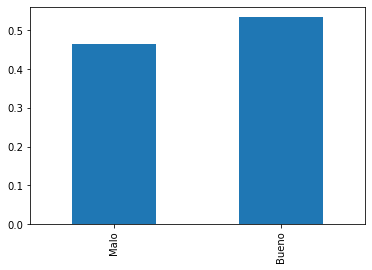

In [10]:
calidad_vino = df_vino.label.value_counts(normalize = True)
calidad_vino[['Malo', 'Bueno']].plot(kind='bar')
calidad_vino

In [ ]:
random.seed(0)
df_entrenamiento, df_prueba = entrenamietno_prueba_split(df_vino, tamanio_prueba =de